<a href="https://colab.research.google.com/github/somir-khan/Colab-Codes/blob/main/bdsl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [52]:
df = pd.read_csv('/content/drive/MyDrive/isharalipi-digit-dataset(28x28).csv')

In [53]:
y_train = df.iloc[:,0]
#y_test = df.iloc[860:,0]
x_train = df.iloc[:,1:]
#x_test = df.iloc[860:,1:]

x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
#x_test = x_test.values.reshape(x_test.shape[0],28,28,1)
n_classes = 10
y_train = np_utils.to_categorical(y_train.values, n_classes)
#y_test = np_utils.to_categorical(y_test.values, n_classes)

In [54]:
input_ = keras.layers.Input(shape=[28,28,1])

conv2d_1 = keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(input_)

conv2d_2 = keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(conv2d_1)

max_pooling2d_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2d_2)

dropout_1 = keras.layers.Dropout(0.25)(max_pooling2d_1)

conv2d_3 = keras.layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(dropout_1)

batch_normalization_1 = keras.layers.BatchNormalization()(conv2d_3)

conv2d_4 = keras.layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(batch_normalization_1)

conv2d_5 = keras.layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(dropout_1)

batch_normalization_2 = keras.layers.BatchNormalization()(conv2d_4)

conv2d_6 = keras.layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(conv2d_5)

max_pooling2d_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(batch_normalization_2)

max_pooling2d_3 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2d_6)

dropout_2 = keras.layers.Dropout(0.20)(max_pooling2d_2)

dropout_3 = keras.layers.Dropout(0.20)(max_pooling2d_3)

add_1 = keras.layers.Add()([dropout_2,dropout_3])

conv2d_7 = keras.layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='swish')(add_1)

max_pooling2d_4 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2d_7)

dropout_4 = keras.layers.Dropout(0.20)(max_pooling2d_4)

flatten_1 = keras.layers.Flatten()(dropout_4)

dense_1 = keras.layers.Dense(2048)(flatten_1)

fully_connected_layer_2 = keras.layers.Dense(10,activation='softmax')(dense_1)


In [55]:
model = keras.Model(inputs=[input_], outputs=[fully_connected_layer_2])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='sgd')
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 28, 28, 32)   832         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 28, 28, 32)   25632       conv2d_28[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_29[0][0]                  
____________________________________________________________________________________________

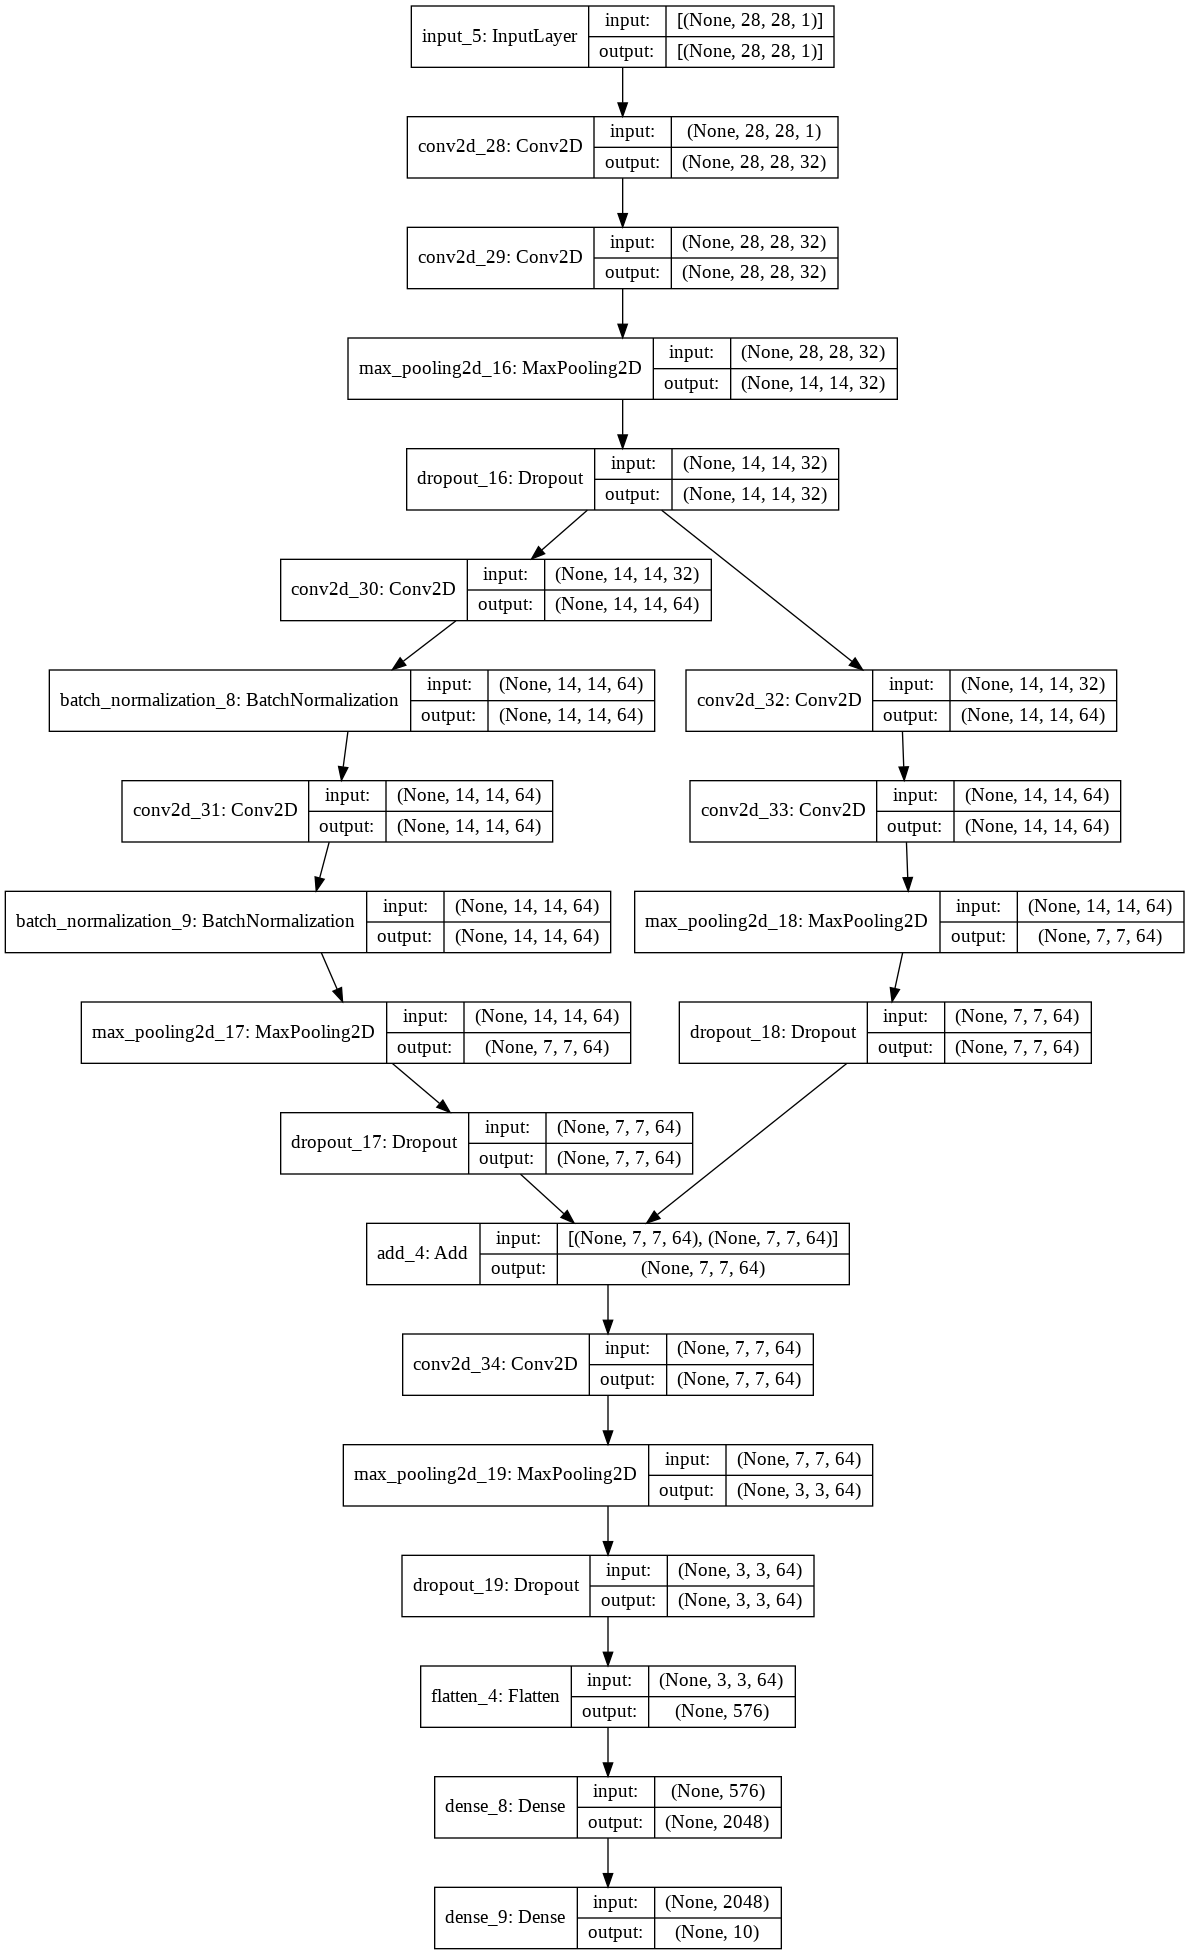

In [56]:
keras.utils.plot_model(model, show_shapes=True)

In [57]:
y_train.shape

(1075, 10)

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.20)

Epoch 1/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 2/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 3/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 4/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 5/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 6/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 7/100
4/4 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.0919 - val_loss: nan - val_accuracy: 0.1256
Epoch 8/100
4/4 [==============================] - 14s 3s/step - loss